# Analysis of performance - power data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
## Import data
file_path = '/Users/yzamora/power/initial_combo_logs/heartbeat_0x1-1200000.log'
df = pd.read_csv(file_path, sep='\s+')
print (df.head())

   Beat  Tag            Timestamp  Global_Rate  Window_Rate  Instant_Rate  \
0     0    0  1527326949297512609     0.000000     0.000000      0.000000   
1     1    1  1527326953058903759     0.531718     0.265859      0.265859   
2     2    2  1527326956838578947     0.397822     0.265214      0.264573   
3     3    3  1527326960616173890     0.353399     0.265049      0.264719   
4     4    4  1527326964388316847     0.331328     0.265062      0.265101   

   Global_Accuracy  Window_Accuracy  Instant_Accuracy  Global_Power  \
0              1.0              1.0               1.0      0.000000   
1              1.0              1.0               1.0      0.793298   
2              1.0              1.0               1.0      0.820799   
3              1.0              1.0               1.0      0.812252   
4              1.0              1.0               1.0      0.808221   

   Window_Power  Instant_Power  
0      0.000000       0.000000  
1      0.793298       0.793298  
2      0.82

## Plotting performance vs power using HeartLogs:

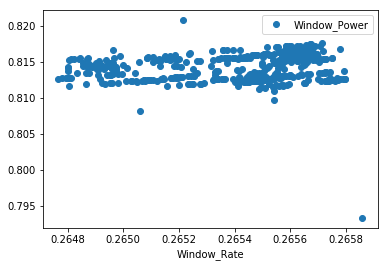

In [4]:
power = df['Window_Rate']
#removing first row, value = 0 
df = df.iloc[1:]
#print( power )
df.plot(x='Window_Rate', y='Window_Power', style='o')


## Performance vs power using STREAM.results

In [6]:
#Import Data
file_path = '/Users/yzamora/power/initial_combo_logs/STREAM.results'
df = pd.read_csv(file_path, sep='\s+')
print (df.head())

  cores     freq      Rate     Power      Energy  WU_PWR_AVG  WU_ENERGY
0  0xFF  2000000  3.411315  5.467605  801.392332         NaN        NaN
1  0xFF  1900000  3.411923  4.292187  628.998114         NaN        NaN
2  0xFF  1800000  3.430406  3.656366  532.934723         NaN        NaN
3  0xFF  1400000  3.434256  3.643640  530.484470         NaN        NaN
4  0xFF  1300000  3.427420  3.644682  531.694592         NaN        NaN


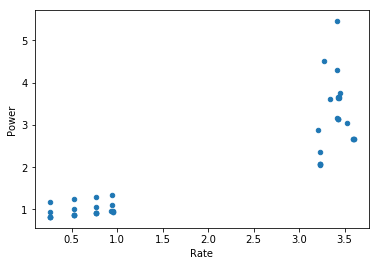

In [7]:

df.plot(x='Rate', y='Power',kind='scatter',style='o')


## Clock Speed vs Number of Cores

First Converting Hex to Binary, then getting the number of cores being used


In [5]:
def convert_to_bin(df):
    cores_hex = df['cores'].tolist()
    cores_bin = []
    big_cores = []
    lil_cores = []
    total_cores = []
    scale = 16 ## equals to hexadecimal
    num_of_bits = 8

    for i in cores_hex:
    #my_hexdata = "1a" 
        bin_val = bin(int(i, scale))[2:].zfill(num_of_bits)
        ncores=0
        nlittle=0
        nbig=0
        for j in range(len(bin_val)): 
            ncores+=int(bin_val[j])
            if j<4: nbig+=int(bin_val[j])
            else: nlittle+=int(bin_val[j])
        #print(bin_val+" big, little, total: "+str(nbig)+" "+str(nlittle)+" "+str(ncores))
        cores_bin.append(bin_val)
        big_cores.append(nbig)
        lil_cores.append(nlittle)
        total_cores.append(ncores)


    #print (cores_bin)
    df['big_cores'] = big_cores
    df['lil_cores'] = lil_cores
    df['total_cores'] = total_cores

    print(df.head())
    return df



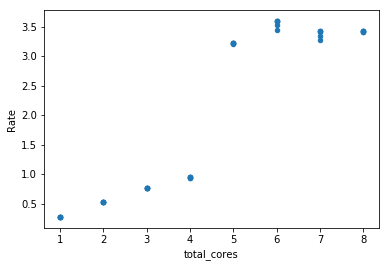

In [9]:
df = convert_to_bin(df)
df.plot(x='total_cores', y='Rate',kind='scatter',style='o')

## Looking at little cores and big cores relationships
Funtion plot_biglil plots rate vs number of cores for both big, little, and core combinations

In [8]:
def plot_biglil(df):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.scatter(x=(df['Rate']),y=(df['big_cores']), label='Big Cores')
    ax1.scatter(x=(df['Rate']),y=(df['lil_cores']), label='Little Cores')
    ax1.scatter(x=(df['Rate']),y=(df['total_cores']), label='Total Cores')
    plt.legend(loc='best');
    ax1.set_xlabel("Rate")
    ax1.set_ylabel("Core Count")
    plt.show()


In [19]:
print (df)


   cores     freq      Rate     Power       Energy  WU_PWR_AVG  WU_ENERGY  \
0   0xFF  2000000  3.411315  5.467605   801.392332         NaN        NaN   
1   0xFF  1900000  3.411923  4.292187   628.998114         NaN        NaN   
2   0xFF  1800000  3.430406  3.656366   532.934723         NaN        NaN   
3   0xFF  1400000  3.434256  3.643640   530.484470         NaN        NaN   
4   0xFF  1300000  3.427420  3.644682   531.694592         NaN        NaN   
5   0xFF  1200000  3.436005  3.652799   531.547274         NaN        NaN   
6   0x7F  2000000  3.278213  4.520206   689.431311         NaN        NaN   
7   0x7F  1900000  3.343341  3.622456   541.741917         NaN        NaN   
8   0x7F  1800000  3.428370  3.130300   456.528899         NaN        NaN   
9   0x7F  1400000  3.430004  3.129436   456.185396         NaN        NaN   
10  0x7F  1300000  3.430376  3.130472   456.286955         NaN        NaN   
11  0x7F  1200000  3.416229  3.174222   464.579766         NaN        NaN   

## New Results 'bigger results' of bit and little cores
Running with various core combinations:
10001 10001 , 1100 1100, 1010 1010, 1000 1000, 1111 1111, 1000 1111, 1010 1111, 1111 0001, 1111 0101, 0101 0101

Frequency Combinations: 1200000, 1300000, 1400000, 1500000, 1600000, 1700000, 2000000

In [11]:
#Import Data
file_path = '/Users/yzamora/power/STREAM.results'
long_df = pd.read_csv(file_path, sep='\s+')
print (long_df.tail())

   cores     freq      Rate     Power      Energy  WU_PWR_AVG  WU_ENERGY
65  0x55  1600000  5.893376  4.612486  391.327924         NaN        NaN
66  0x55  1500000  5.895988  4.602915  390.342841         NaN        NaN
67  0x55  1400000  5.868398  4.597875  391.748605         NaN        NaN
68  0x55  1300000  5.888496  4.601728  390.738706         NaN        NaN
69  0x55  1200000  5.876194  4.600005  391.409825         NaN        NaN


In [7]:
long_df = convert_to_bin(long_df)
print (long_df)

  cores     freq      Rate     Power      Energy  WU_PWR_AVG  WU_ENERGY  \
0  0x99  2000000  5.670083  4.539333  400.287916         NaN        NaN   
1  0x99  1700000  5.892192  4.610204  391.212691         NaN        NaN   
2  0x99  1600000  5.892635  4.589785  389.450600         NaN        NaN   
3  0x99  1500000  5.995669  4.610535  384.488650         NaN        NaN   
4  0x99  1400000  5.958496  4.611672  386.982460         NaN        NaN   

   big_cores  lil_cores  total_cores  
0          2          2            4  
1          2          2            4  
2          2          2            4  
3          2          2            4  
4          2          2            4  
   cores     freq      Rate     Power      Energy  WU_PWR_AVG  WU_ENERGY  \
0   0x99  2000000  5.670083  4.539333  400.287916         NaN        NaN   
1   0x99  1700000  5.892192  4.610204  391.212691         NaN        NaN   
2   0x99  1600000  5.892635  4.589785  389.450600         NaN        NaN   
3   0x99  1

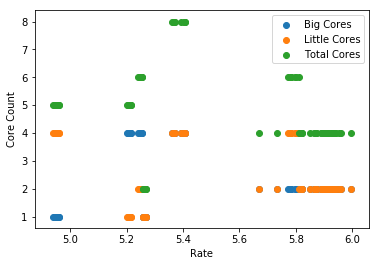

In [9]:
plot_biglil(long_df)